In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [17]:
#Read data from CSV files
cpu = pd.read_csv('cpu_usage.csv')
memory = pd.read_csv('memory_usage.csv')
requests = pd.read_csv('req_per_sec.csv', delimiter=";")
replicas = pd.read_csv('num_of_replicas.csv', delimiter=";")

#Transform 'Time' to seconds array for plots
time = pd.to_datetime(cpu['Time'], format='%Y-%m-%d %H:%M:%S')
time_plot = []
for t in time:
    time_plot.append((t - time[0]).seconds)

<Figure size 432x288 with 0 Axes>

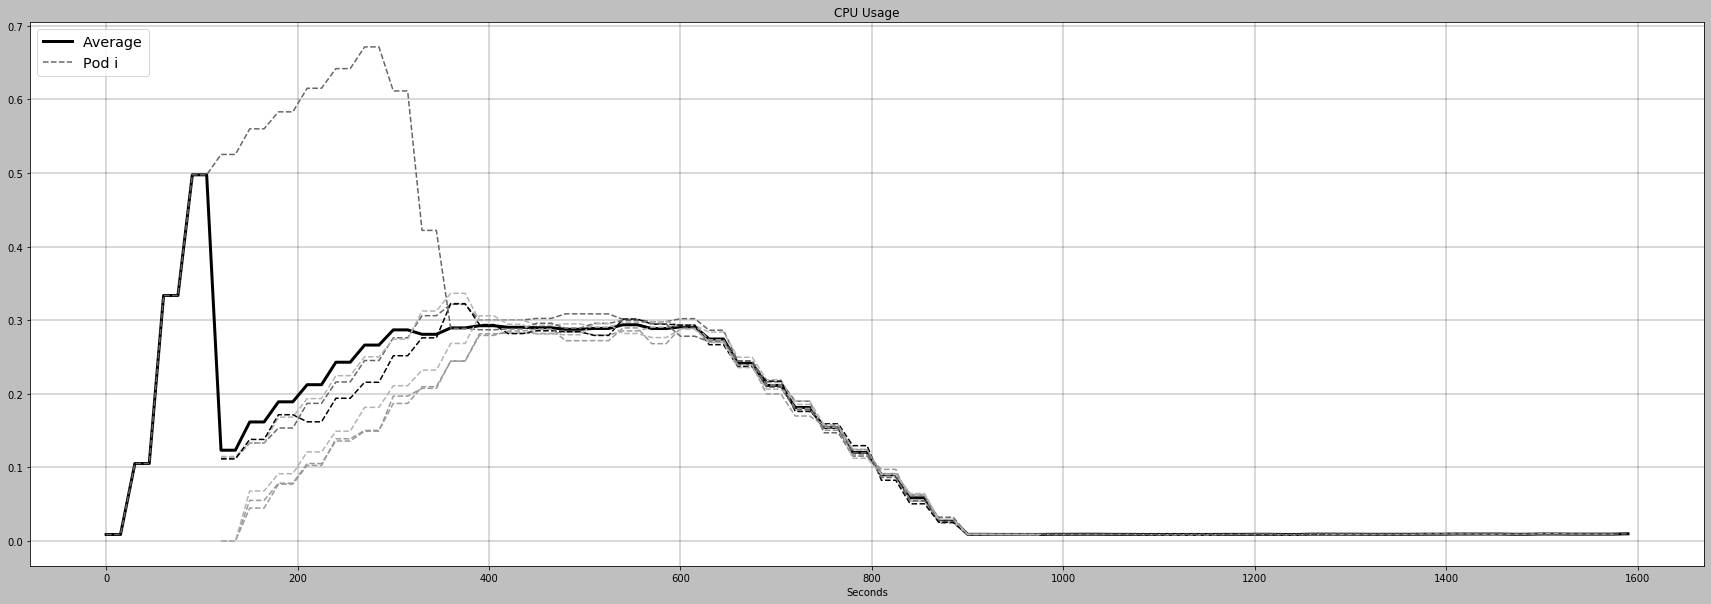

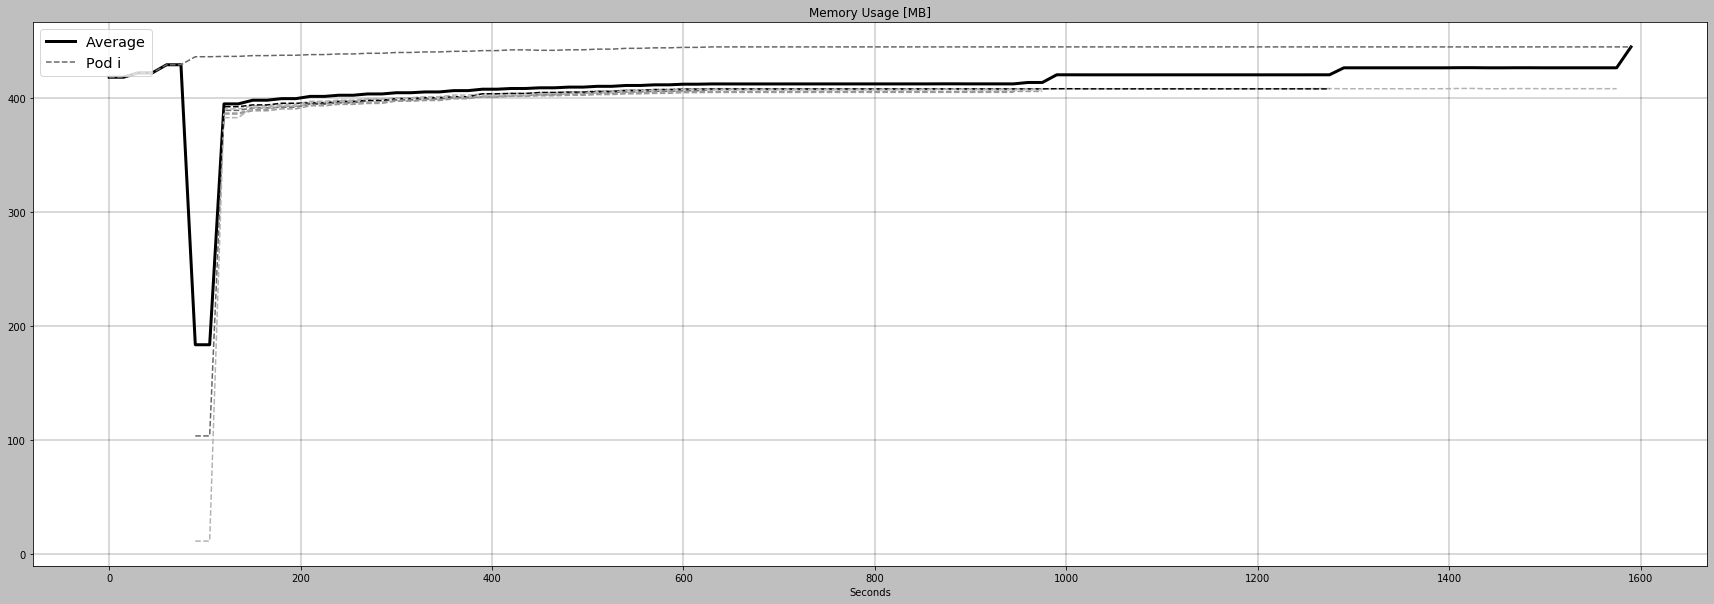

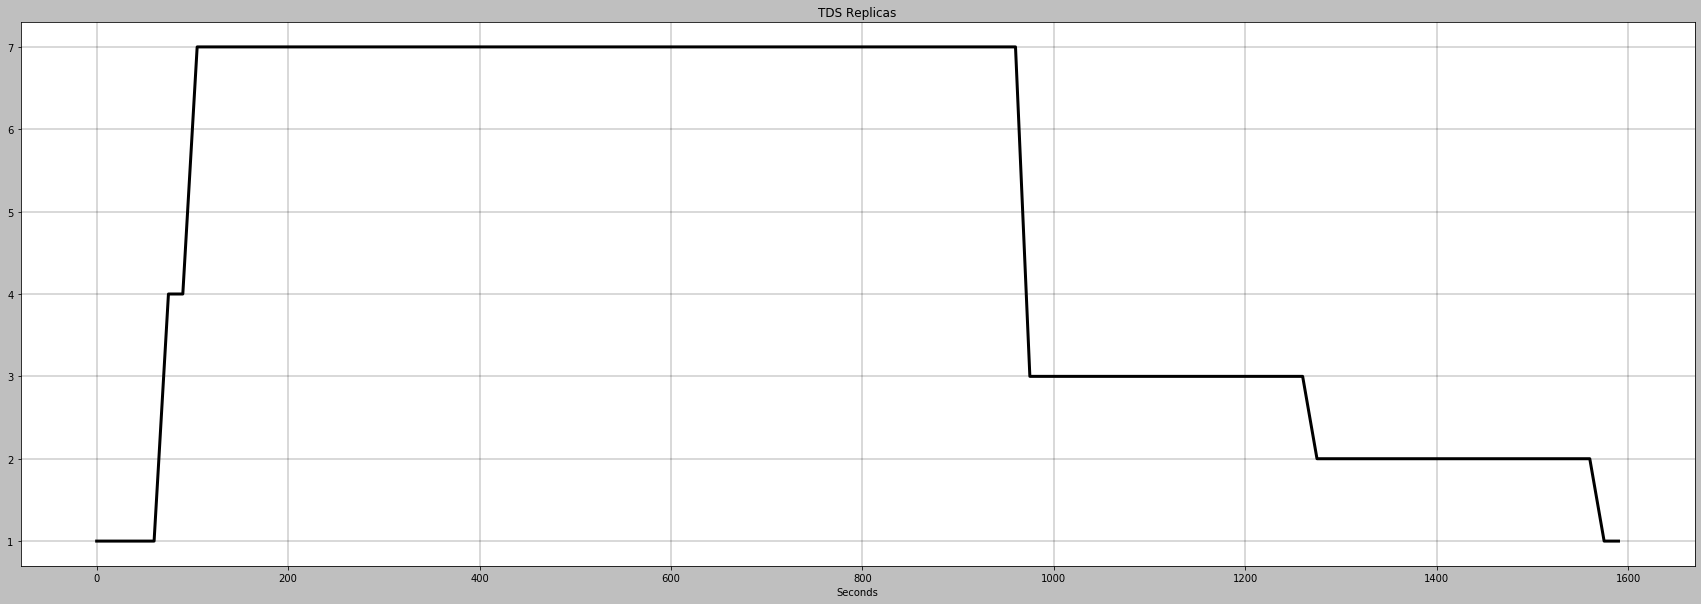

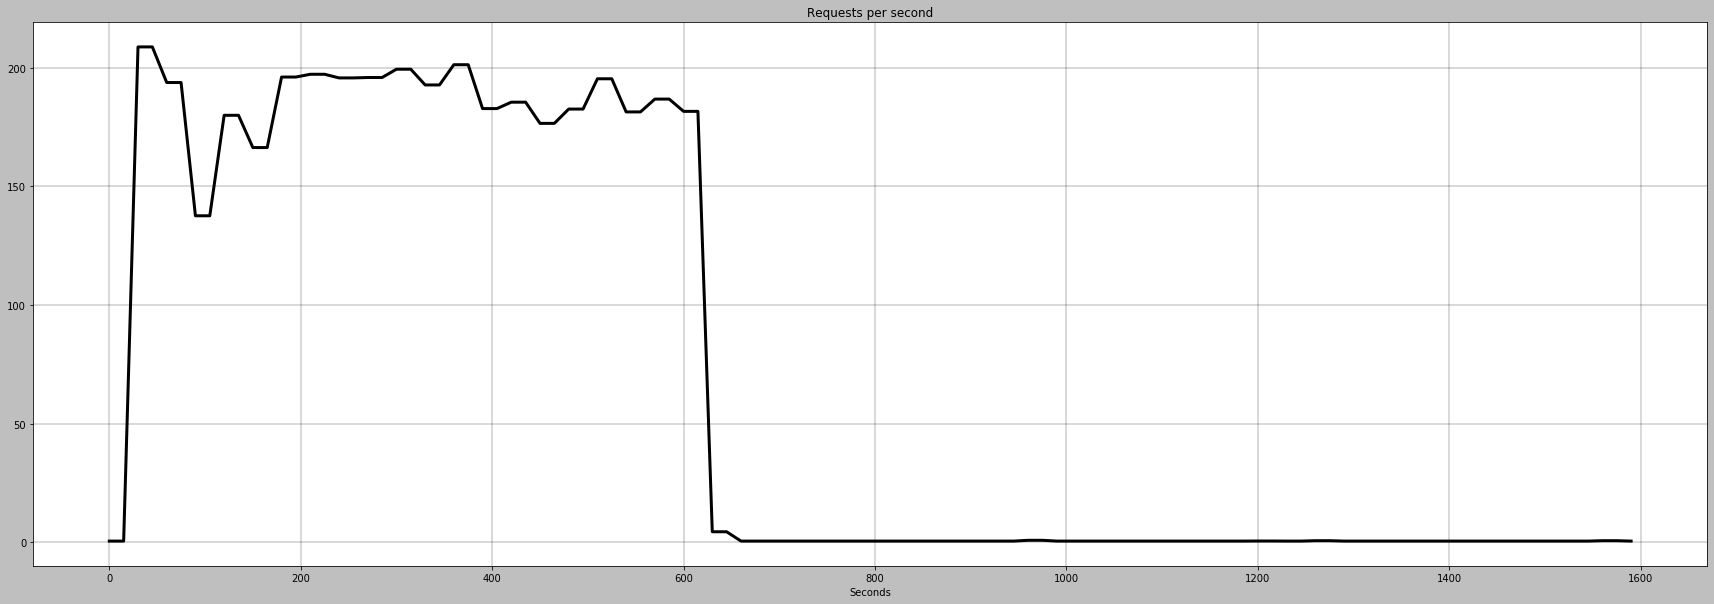

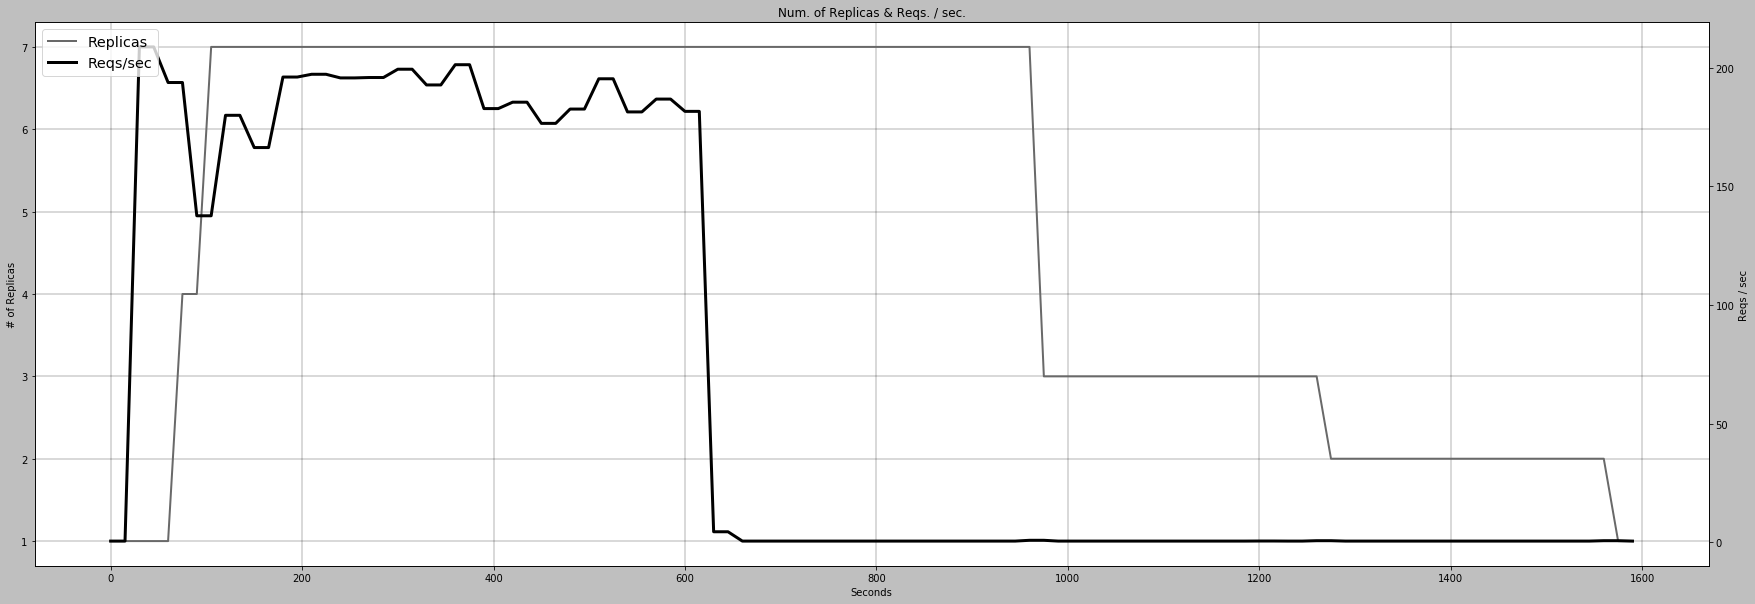

In [19]:
plt.style.use('grayscale')

#Plot CPU Usage
plt.figure(1)
plt.figure(figsize=(30,10))
plt.xlabel('Seconds')
plt.title('CPU Usage')
plt.plot(time_plot, cpu['avg'], linewidth=3, label = 'Average')
plt.plot(time_plot, cpu['Pod 1'], linestyle='--', label = 'Pod i')
plt.plot(time_plot, cpu['Pod 2'], linestyle='--')
plt.plot(time_plot, cpu['Pod 3'], linestyle='--')
plt.plot(time_plot, cpu['Pod 4'], linestyle='--')
plt.plot(time_plot, cpu['Pod 5'], linestyle='--')
plt.plot(time_plot, cpu['Pod 6'], linestyle='--')
plt.plot(time_plot, cpu['Pod 7'], linestyle='--')

plt.legend(loc='upper left', fontsize='x-large')
plt.grid(True, linewidth=0.3)
plt.savefig('cpu_usage.png')


#Plot Memory Usage
plt.figure(2)
plt.figure(figsize=(30,10))
plt.xlabel('Seconds')
plt.title('Memory Usage [MB]')
plt.plot(time_plot, memory['avg'].divide(1000000), linewidth=3, label = 'Average')
plt.plot(time_plot, memory['Pod 1'].divide(1000000), linestyle='--', label = 'Pod i')
plt.plot(time_plot, memory['Pod 2'].divide(1000000), linestyle='--')
plt.plot(time_plot, memory['Pod 3'].divide(1000000), linestyle='--')
plt.plot(time_plot, memory['Pod 4'].divide(1000000), linestyle='--')
plt.plot(time_plot, memory['Pod 5'].divide(1000000), linestyle='--')
plt.plot(time_plot, memory['Pod 6'].divide(1000000), linestyle='--')
plt.plot(time_plot, memory['Pod 7'].divide(1000000), linestyle='--')

plt.legend(loc='upper left', fontsize='x-large')
plt.grid(True, linewidth=0.3)
plt.savefig('memory_usage.png')

#Plot Number of TDS Replicas
plt.figure(3)
plt.figure(figsize=(30,10))
plt.xlabel('Seconds')
plt.title('TDS Replicas')
plt.plot(time_plot, replicas['replicas'], linewidth=3)
plt.grid(True, linewidth=0.3)
plt.savefig('num_of_replicas.png')


#Plot Requests per second
plt.figure(4)
plt.figure(figsize=(30,10))
plt.xlabel('Seconds')
plt.title('Requests per second')
plt.plot(time_plot, requests['requests'], linewidth=3)
plt.grid(True, linewidth=0.3)
plt.savefig('req_per_sec.png')


#Plot Number of TDS Replicas & Requests per Sec
fig, ax1 = plt.subplots()
ax1.grid(True, linewidth=0.3)
fig.set_figheight(10)
fig.set_figwidth(30)
ax1.set_xlabel('Seconds')
ax1.set_ylabel('# of Replicas')
l1, = ax1.plot(time_plot, replicas['replicas'], linewidth=2, color='dimgray', label='Replicas')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Reqs / sec')
l2, = ax2.plot(time_plot, requests['requests'], linewidth=3, label='Reqs/sec')
plt.legend([l1,l2], ["Replicas","Reqs/sec"], loc='upper left', fontsize='x-large')
plt.title('Num. of Replicas & Reqs. / sec.')
plt.savefig('replicas_and_requests.png')